# US POLICE SHOOTINGS IN 2015-2022

### In 2015, The Washington Post began to log every fatal shooting by an on-duty police officer in the United States. In that time there have been more than 5,000 such shootings recorded by The Post.

### After Michael Brown, an unarmed Black man, was killed in 2014 by police in Ferguson, Mo., a Post investigation found that the FBI undercounted fatal police shootings by more than half. This is because reporting by police departments is voluntary and many departments fail to do so.

### The Post’s data relies primarily on news accounts, social media postings and police reports. Analysis of more than five years of data reveals that the number and circumstances of fatal shootings and the overall demographics of the victims have remained relatively constant.

In [191]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [192]:
# Import necessary tools

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [193]:
# Import database

df_civilians = pd.read_csv("US Police shootings in from 2015-22.csv")

<IPython.core.display.Javascript object>

In [194]:
# Check the data

df_civilians.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,1,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,2,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,3,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,4,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,5,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


<IPython.core.display.Javascript object>

In [195]:
# Check if all database was loaded

df_civilians.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
7724,7725,NaN,2022-09-07,shot,screwdriver,NaN,M,NaN,Flagstaff,AZ,False,other,Foot,False,-111.584,35.224,True
7725,7726,NaN,2022-09-07,shot,gun,NaN,M,W,Springville,AL,False,attack,Car,False,-86.472,33.775,True
7726,7727,NaN,2022-09-07,shot,knife,61.0,M,B,St. Louis,MO,False,other,Not fleeing,False,-90.290,38.668,True
7727,7728,Tyler Michael Gardner,2022-09-07,shot,gun,27.0,M,NaN,Washington County,TN,False,attack,Other,False,-82.539,36.309,True
7728,7729,Reginald Lamont Grant,2022-09-07,shot,gun,30.0,M,NaN,Columbus,GA,False,attack,Foot,False,NaN,NaN,True


<IPython.core.display.Javascript object>

In [196]:
# Check data type

type(df_civilians)

pandas.core.frame.DataFrame

<IPython.core.display.Javascript object>

In [197]:
# Check DataFrame types

df_civilians.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

<IPython.core.display.Javascript object>

In [198]:
# Check date type

df_civilians["date"].dtype

dtype('O')

<IPython.core.display.Javascript object>

In [199]:
# Change date type

df_civilians["date"] = df_civilians["date"].astype("datetime64")
df_civilians["date"]

0      2015-01-02
1      2015-01-02
2      2015-01-03
3      2015-01-04
4      2015-01-04
          ...    
7724   2022-09-07
7725   2022-09-07
7726   2022-09-07
7727   2022-09-07
7728   2022-09-07
Name: date, Length: 7729, dtype: datetime64[ns]

<IPython.core.display.Javascript object>

In [200]:
# Change age type

df_civilians["age"] = df_civilians["age"].fillna(0)
df_civilians["age"] = df_civilians["age"].astype(int)
df_civilians["age"]

0       53
1       47
2       23
3       32
4       39
        ..
7724     0
7725     0
7726    61
7727    27
7728    30
Name: age, Length: 7729, dtype: int64

<IPython.core.display.Javascript object>

In [201]:
# Replace name of manner of dead

df_civilians["manner_of_death"] = df_civilians["manner_of_death"].replace(
    "shot and Tasered", "shot and tasered"
)
df_civilians["manner_of_death"]

0                   shot
1                   shot
2       shot and tasered
3                   shot
4                   shot
              ...       
7724                shot
7725                shot
7726                shot
7727                shot
7728                shot
Name: manner_of_death, Length: 7729, dtype: object

<IPython.core.display.Javascript object>

In [202]:
# Check for NaN

df_civilians.isnull().sum()

id                            0
name                        417
date                          0
manner_of_death               0
armed                       209
age                           0
gender                       20
race                       1460
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                        875
body_camera                   0
longitude                   837
latitude                    837
is_geocoding_exact            0
dtype: int64

<IPython.core.display.Javascript object>

In [203]:
# Add new column "year" in df_civilians

year = df_civilians["date"].dt.year

df_civilians.insert(loc=3, column="year", value=year)

<IPython.core.display.Javascript object>

In [204]:
# Add new column "month" in df_civilians

month = df_civilians["date"].dt.month

df_civilians.insert(loc=4, column="month", value=month)

<IPython.core.display.Javascript object>

In [205]:
# Check added columns

df_civilians.iloc[:, 2:5]

,date,year,month
0,2015-01-02,2015,1
1,2015-01-02,2015,1
2,2015-01-03,2015,1
3,2015-01-04,2015,1
4,2015-01-04,2015,1
...,...,...,...
7724,2022-09-07,2022,9
7725,2022-09-07,2022,9
7726,2022-09-07,2022,9
7727,2022-09-07,2022,9


<IPython.core.display.Javascript object>

## GENERAL ANALYSIS

In [206]:
# Get personal data: name, city, signs of mental ilness of first 100 rows

df_civilians.iloc[:100, [1, 9, 11]]

,name,race,state
0,Tim Elliot,A,WA
1,Lewis Lee Lembke,W,OR
2,John Paul Quintero,H,KS
3,Matthew Hoffman,W,CA
4,Michael Rodriguez,H,CO
...,...,...,...
95,Vincent Cordaro,W,NY
96,Joseph Paffen,W,FL
97,Larry Hostetter,W,TX
98,Kenneth Kreyssig,W,ME


<IPython.core.display.Javascript object>

In [207]:
# Get general data: year, age, gender, race and state of first 100 rows

df_civilians.loc[:99, ["year", "age", "gender", "race", "state"]]

,year,age,gender,race,state
0,2015,53,M,A,WA
1,2015,47,M,W,OR
2,2015,23,M,H,KS
3,2015,32,M,W,CA
4,2015,39,M,H,CO
...,...,...,...,...,...
95,2015,57,M,W,NY
96,2015,46,M,W,FL
97,2015,41,M,W,TX
98,2015,61,M,W,ME


<IPython.core.display.Javascript object>

In [208]:
# How many civilians were killed in 2015-2022?

amount_of_killed = df_civilians["id"].count()
amount_of_killed

7729

<IPython.core.display.Javascript object>

In [209]:
# What was the manner of death?

df_civilians["manner_of_death"].unique()

array(['shot', 'shot and tasered'], dtype=object)

<IPython.core.display.Javascript object>

In [210]:
# Distribution of manner of death

df_civilians["manner_of_death"].value_counts()

shot                7390
shot and tasered     339
Name: manner_of_death, dtype: int64

<IPython.core.display.Javascript object>

In [211]:
# Get seaborn customized for all visualizations

sns.set(rc={"figure.figsize": (13, 6)})

<IPython.core.display.Javascript object>

In [212]:
sns.set_palette("Paired")

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='manner_of_death', ylabel='count'>

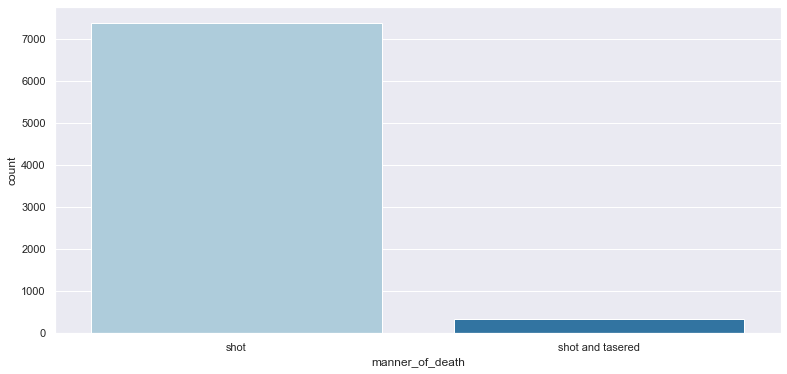

<IPython.core.display.Javascript object>

In [213]:
# Visualization of manner of death

sns.countplot(x=df_civilians["manner_of_death"])

In [214]:
# Unique weapon

df_civilians["armed"].nunique()

104

<IPython.core.display.Javascript object>

In [215]:
# Types of weapons

df_civilians["armed"].unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', nan, 'shovel',
       'vehicle', 'hammer', 'hatchet', 'sword', 'machete', 'box cutter',
       'undetermined', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'crossbow',
       'BB gun', 'metal pole', 'Taser', 'metal pipe', 'metal hand tool',
       'blunt object', 'metal stick', 'sharp object', 'meat cleaver',
       'carjack', 'chain', "contractor's level", 'railroad spikes',
       'stapler', 'beer bottle', 'unknown weapon', 'binoculars',
       'pellet gun', 'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'pair of scissors', 'pole', 'pick-axe', 'flashlight', 'baton',
       'spear', 'chair', 'pitchfork', 'hatchet and gun', 'rock',
       'piece of wood', 'pipe', 'glass shard', 'motorcycle',
       'pepper spray', 'metal rake

<IPython.core.display.Javascript object>

In [216]:
# The most popular weapon

df_civilians.value_counts("armed").idxmax()

'gun'

<IPython.core.display.Javascript object>

In [217]:
# Top 5 of weapons

armed_top_5 = df_civilians["armed"].value_counts().head(5)
armed_top_5

gun             4407
knife           1108
unarmed          456
undetermined     313
vehicle          276
Name: armed, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='armed', ylabel='count'>

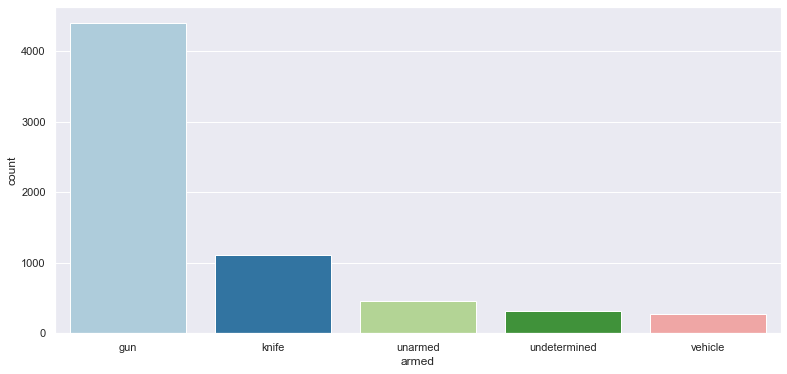

<IPython.core.display.Javascript object>

In [218]:
# Visualization of top 5 of weapons

sns.countplot(
    x=df_civilians["armed"], order=df_civilians["armed"].value_counts().iloc[:5].index
)

In [219]:
# Distribution of age

df_civilians[["age"]].value_counts()

age
0      482
31     254
32     252
27     249
34     247
      ... 
89       1
2        1
78       1
8        1
92       1
Length: 82, dtype: int64

<IPython.core.display.Javascript object>

In [220]:
# Top 5 by age

filter_zero_excl = df_civilians["age"] != 0
age_top_5 = df_civilians[filter_zero_excl]["age"].value_counts().head(5)
age_top_5

31    254
32    252
27    249
34    247
33    242
Name: age, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='count'>

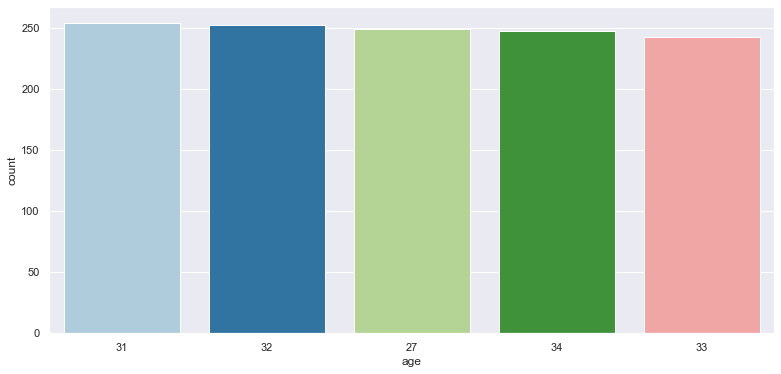

<IPython.core.display.Javascript object>

In [221]:
# Visualization of top 5 by age

sns.countplot(
    x=df_civilians[filter_zero_excl]["age"],
    order=df_civilians[filter_zero_excl]["age"].value_counts().iloc[:5].index,
)

In [222]:
# Average of age

average_age = df_civilians["age"].mean()
average_age

34.86039591150214

<IPython.core.display.Javascript object>

In [223]:
# Oldest person killed

oldest_person = df_civilians["age"].max()
oldest_person

92

<IPython.core.display.Javascript object>

In [224]:
# Youngest person killed

youngest_person = df_civilians[filter_zero_excl]["age"].min()
youngest_person

2

<IPython.core.display.Javascript object>

In [225]:
# Persons killed under age of 18

under_18 = (df_civilians[filter_zero_excl]["age"] < 18).sum()
under_18

129

<IPython.core.display.Javascript object>

In [226]:
# Age distribution of children killed

filter_child = df_civilians["age"] < 18
df_civilians[filter_zero_excl][filter_child]["age"].value_counts()

/var/folders/1t/m94998bs7lg3fw2fs0z_y32r0000gn/T/ipykernel_16421/2294785403.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_civilians[filter_zero_excl][filter_child]["age"].value_counts()


17    62
16    35
15    18
14     5
13     3
6      2
12     2
8      1
2      1
Name: age, dtype: int64

<IPython.core.display.Javascript object>

In [227]:
# Allocation between genders

df_civilians[["gender"]].value_counts()

gender
M         7361
F          348
dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='gender', ylabel='count'>

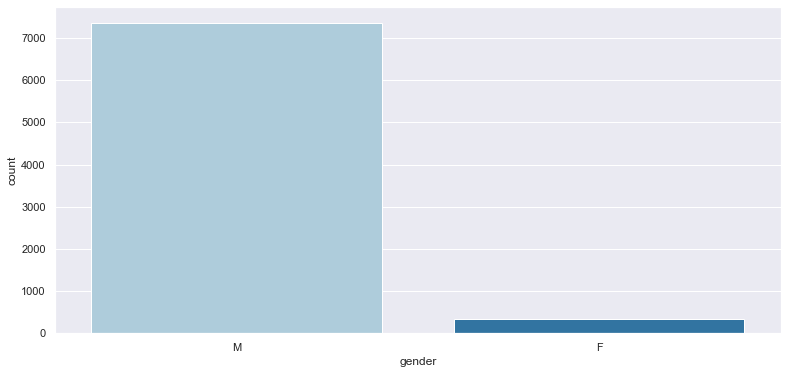

<IPython.core.display.Javascript object>

In [228]:
# Visualization of gender

sns.countplot(x=df_civilians["gender"])

In [229]:
# Allocation within races

df_civilians[["race"]].value_counts()

race
W       3198
B       1686
H       1128
A        113
N         97
O         47
dtype: int64

<IPython.core.display.Javascript object>

In [230]:
# According to publicly available data, there was a mistake in the database Police Shootings
# i.e. W was switched with B in column "race"

df_civilians["race"] = df_civilians["race"].replace(["W", "B"], ["B", "W"])

<IPython.core.display.Javascript object>

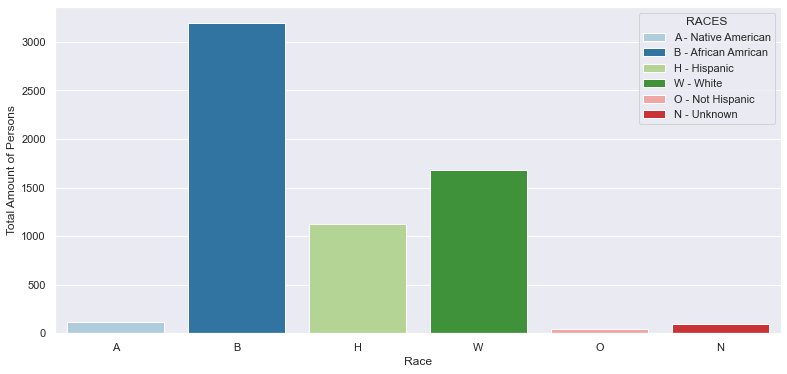

<IPython.core.display.Javascript object>

In [231]:
# Visualization of races

races_visual = sns.countplot(x="race", data=df_civilians, hue="race", dodge=False)
races_visual.set(xlabel="Race", ylabel="Total Amount of Persons")
h, l = races_visual.get_legend_handles_labels()
labels = [
    "A - Native American",
    "B - African Amrican",
    "H - Hispanic",
    "W - White",
    "O - Not Hispanic",
    "N - Unknown",
]
races_visual.legend(h, labels, title="RACES", loc="upper right")
plt.show()

In [232]:
# Top 5 cities

df_civilians[["city"]].value_counts().head(5)

city       
Los Angeles    128
Phoenix        101
Houston         87
San Antonio     66
Las Vegas       63
dtype: int64

<IPython.core.display.Javascript object>

In [271]:
# Safest city in accrodance with Police Shooting database

df_civilians["city"].value_counts().tail(1)

# in Wisconsin

Strongs Prairie    1
Name: city, dtype: int64

<IPython.core.display.Javascript object>

In [234]:
# Top 5 states

top_5_states = df_civilians[["state"]].value_counts().head(5)
top_5_states

state
CA       1114
TX        694
FL        494
AZ        351
GA        291
dtype: int64

<IPython.core.display.Javascript object>

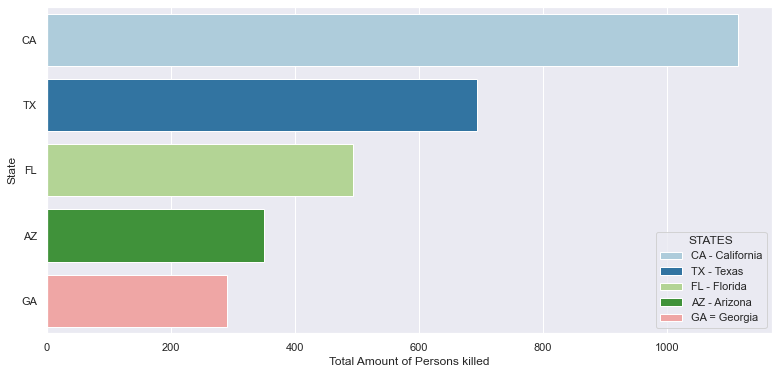

<IPython.core.display.Javascript object>

In [235]:
# Visualization of top 5 States

order_limit = df_civilians["state"].value_counts().iloc[:5].index
states_visual = sns.countplot(
    data=df_civilians,
    y="state",
    hue="state",
    dodge=False,
    hue_order=order_limit,
    order=order_limit,
)
states_visual.set(ylabel="State", xlabel="Total Amount of Persons killed")
h, l = races_visual.get_legend_handles_labels()
labels = [
    "CA - California",
    "TX - Texas",
    "FL - Florida",
    "AZ - Arizona",
    "GA = Georgia",
]
states_visual.legend(h, labels, title="STATES")

In [236]:
# Safest State in accrodance with Police Shooting database

df_civilians["state"].value_counts().tail(1)
# RI - Rhode Island

RI    6
Name: state, dtype: int64

<IPython.core.display.Javascript object>

In [237]:
# How many persons showed signs of mental illness?

filter_having_mental = df_civilians["signs_of_mental_illness"] == True
df_civilians[filter_having_mental]["signs_of_mental_illness"].count()

1640

<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Was there any sign of mental illness?'),
 Text(0.5, 0, 'Total Amount of Persons')]

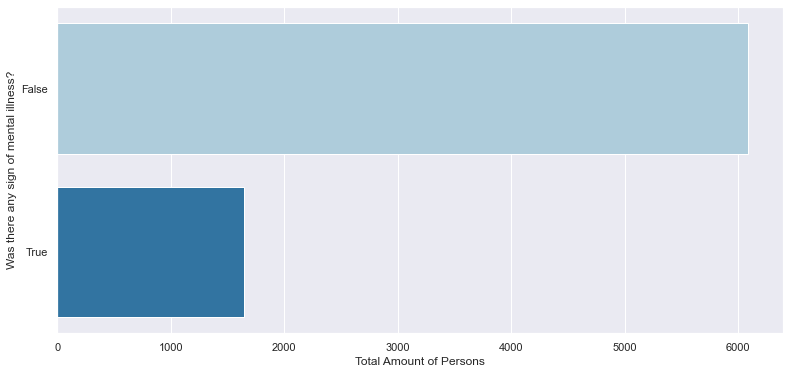

<IPython.core.display.Javascript object>

In [238]:
# Visualization of signs of mental illness

illness_visual = sns.countplot(y=df_civilians["signs_of_mental_illness"])
illness_visual.set(
    ylabel="Was there any sign of mental illness?", xlabel="Total Amount of Persons"
)

In [239]:
# Types of threat

df_civilians[["threat_level"]].value_counts()

threat_level
attack          4875
other           2552
undetermined     302
dtype: int64

<IPython.core.display.Javascript object>

In [240]:
# Types of flee

df_civilians.groupby(["flee"])[["flee"]].count()

,flee
flee,
Car,1249
Foot,982
Not fleeing,4336
Other,287


<IPython.core.display.Javascript object>

[Text(0, 0.5, 'Type of Flee'), Text(0.5, 0, 'Total Amount of Persons')]

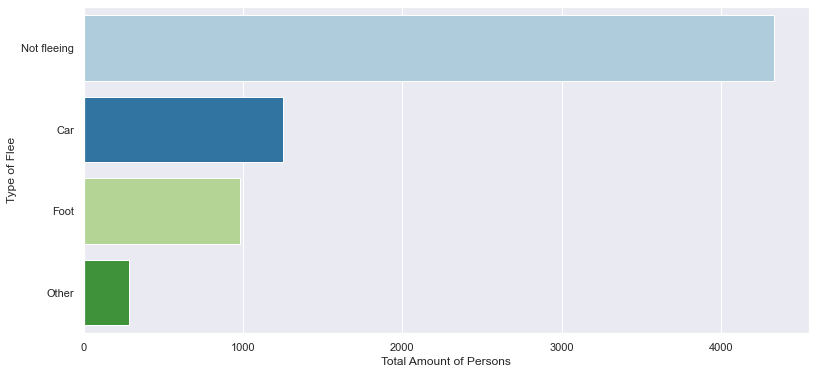

<IPython.core.display.Javascript object>

In [241]:
# Visualization of signs of type of flee

flee_visual = sns.countplot(y=df_civilians["flee"])
flee_visual.set(ylabel="Type of Flee", xlabel="Total Amount of Persons")

In [242]:
# How many police officers had body cameras during the shooting?

filter_camera = df_civilians["body_camera"] == True
df_civilians[filter_camera]["body_camera"].count()

1106

<IPython.core.display.Javascript object>

[Text(0.5, 0, 'Body Camera'), Text(0, 0.5, 'Total Amount of Police Officers')]

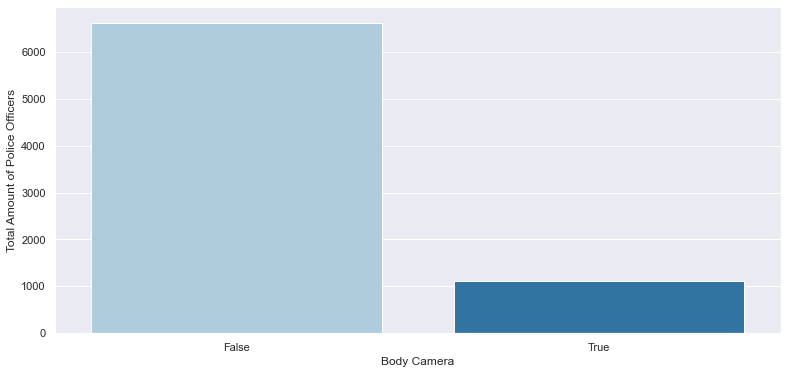

<IPython.core.display.Javascript object>

In [243]:
# Visualization of body camera

flee_visual = sns.countplot(x=df_civilians["body_camera"])
flee_visual.set(xlabel="Body Camera", ylabel="Total Amount of Police Officers")

## HIGHER LEVEL ANALYSIS

### POLICE SHOOTING AND OFFICERS KILLED

In [247]:
# New DataFrame for Police Officers killed in the line of duty under official FBI reports

df_officers = pd.DataFrame(
    {
        "year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        "officers_killed": [112, 150, 137, 150, 126, 128, 179, np.nan],
    }
)

df_officers

,year,officers_killed
0,2015,112.0
1,2016,150.0
2,2017,137.0
3,2018,150.0
4,2019,126.0
5,2020,128.0
6,2021,179.0
7,2022,NaN


<IPython.core.display.Javascript object>

In [248]:
# Check NaN

df_officers.isna().sum()

year               0
officers_killed    1
dtype: int64

<IPython.core.display.Javascript object>

In [249]:
# Create new DataFrame only for year and total amount of civilians killed

df_civilians["year"].value_counts()

df_civilians_by_year = pd.DataFrame(
    {
        "year": [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
        "civilians_killed": [1054, 1020, 999, 994, 993, 981, 958, 730],
    }
)
df_civilians_by_year

,year,civilians_killed
0,2015,1054
1,2016,1020
2,2017,999
3,2018,994
4,2019,993
5,2020,981
6,2021,958
7,2022,730


<IPython.core.display.Javascript object>

In [250]:
# Merge DataFrames df_civilians and df_officers

df = df_civilians_by_year.merge(df_officers, how="inner", on="year")
df

,year,civilians_killed,officers_killed
0,2015,1054,112.0
1,2016,1020,150.0
2,2017,999,137.0
3,2018,994,150.0
4,2019,993,126.0
5,2020,981,128.0
6,2021,958,179.0
7,2022,730,NaN


<IPython.core.display.Javascript object>

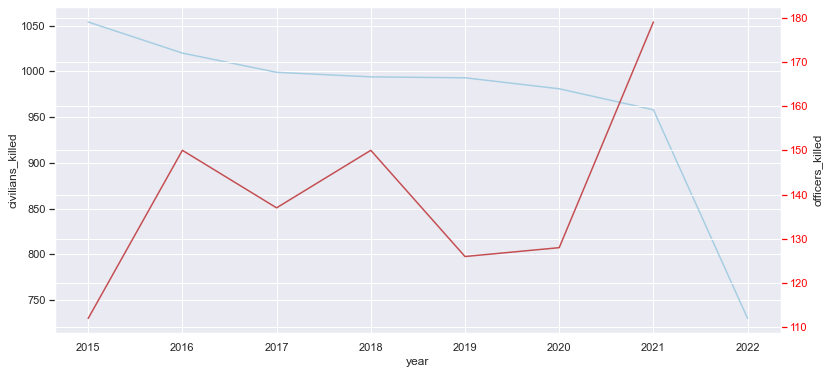

<IPython.core.display.Javascript object>

In [251]:
# Comparison of civilians and officers killed in 2015-2022

ax1 = plt.subplot()
ax2 = ax1.twinx()
sns.lineplot(data=df, x="year", y="civilians_killed", ax=ax1)
sns.lineplot(data=df, x="year", y="officers_killed", color="r", ax=ax2)
ax2.tick_params(axis="y", colors="red")

# The number of persons killed by police decreases sligthly year by year.
# The number of police officers killed in a line of duty is unstable but seems to increase.

### POLICE SHOOTINGS

In [273]:
# Select age and receive victim's name


def name_by_age(age, df):
    df_result = df.set_index("age")
    result = df_result.loc[age]["name"]
    return result


name_by_age(2, df_civilians)

'Clesslynn Jane Crawford'

<IPython.core.display.Javascript object>

In [253]:
# Persons' names killed in CA, TX and FL above average age

top_3_states = df_civilians["state"].isin(["CA", "TX", "FL"])
age = df_civilians["age"] > average_age
df_civilians[top_3_states & age][["name"]]

,name
25,Richard McClendon
30,Robert Edwards
35,Jose Ceja
37,Scott Hall
38,Zaki Shinwary
...,...
7690,Frank Correa
7697,Brian Underwood
7699,J'Quinton D. Hopson
7704,Augustine Flores


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='by_month', ylabel='counts'>

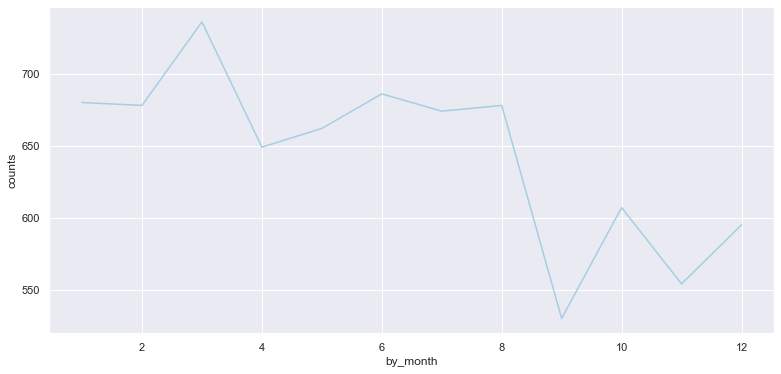

<IPython.core.display.Javascript object>

In [272]:
# Visualization of shootings by month

df_shootings_by_month = (
    df_civilians["month"]
    .value_counts()
    .rename_axis("by_month")
    .reset_index(name="counts")
)
df_shootings_by_month

sns.lineplot(data=df_shootings_by_month, x="by_month", y="counts")

In [256]:
# Gender by age

df_civilians[filter_zero_excl].groupby("gender")["age"].value_counts()

gender  age
F       30     14
        27     13
        25     12
        33     12
        29     11
               ..
M       12      1
        78      1
        89      1
        91      1
        92      1
Name: age, Length: 139, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='by_age', ylabel='counts'>

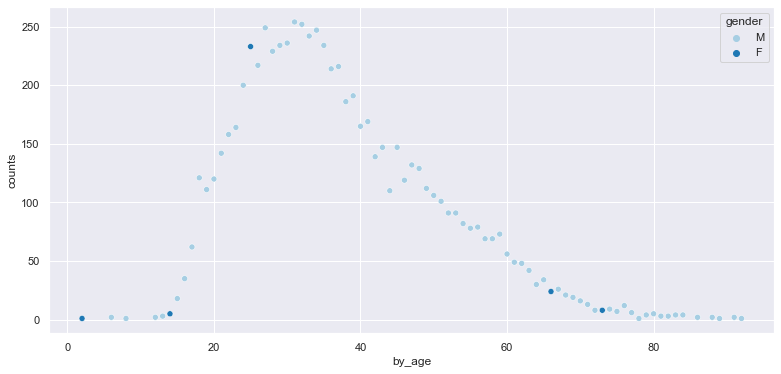

<IPython.core.display.Javascript object>

In [257]:
# Shootings by age and gender

df_shootings_by_age = (
    df_civilians[filter_zero_excl]["age"]
    .value_counts()
    .rename_axis("by_age")
    .reset_index(name="counts")
)
df_shootings_by_age

sns.scatterplot(
    x=df_shootings_by_age["by_age"],
    y=df_shootings_by_age["counts"],
    hue=df_civilians["gender"],
)

In [258]:
# Min and Max age by State

age_max_min_by_state = (
    df_civilians[filter_zero_excl]
    .groupby("state")["age"]
    .agg([min, max])
    .sort_values("min")
)
age_max_min_by_state

,min,max
state,,
KS,2,67
LA,6,71
TX,6,84
PA,8,91
IL,13,68
OH,13,76
WI,14,77
AZ,14,89
CA,14,91


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='year', ylabel='manner_of_death'>

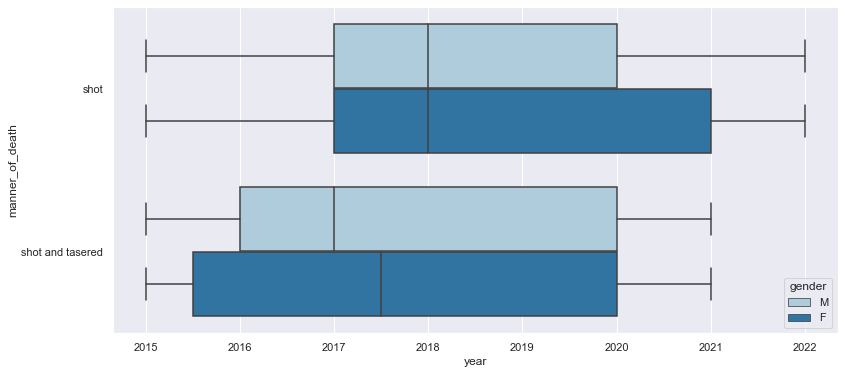

<IPython.core.display.Javascript object>

In [259]:
# Manner of death by year and gender

sns.boxplot(data=df_civilians, x="year", y="manner_of_death", hue="gender")


<AxesSubplot:xlabel='manner_of_death', ylabel='year'>

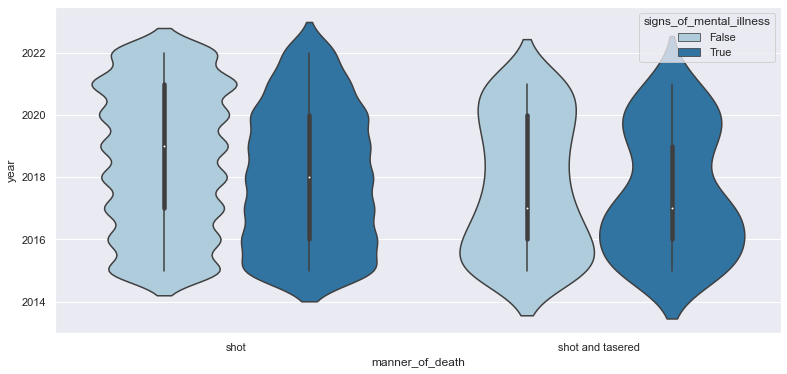

<IPython.core.display.Javascript object>

In [260]:
# Manner of death by year and signs of mental illness

sns.violinplot(
    data=df_civilians, x="manner_of_death", y="year", hue="signs_of_mental_illness"
)

<AxesSubplot:xlabel='age', ylabel='race'>

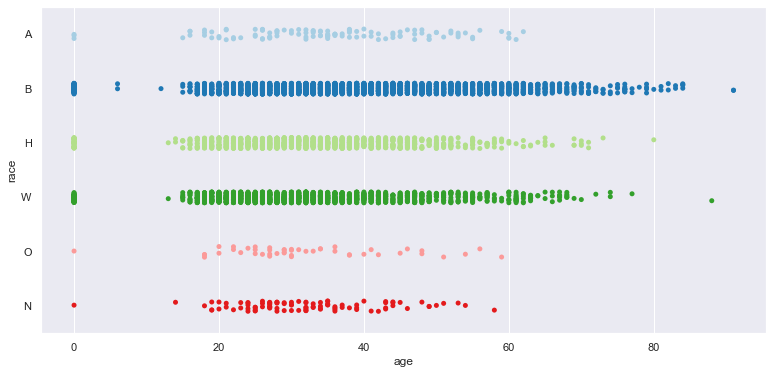

<IPython.core.display.Javascript object>

In [261]:
# Race by age

sns.stripplot(data=df_civilians, x="age", y="race", orient="h")

<AxesSubplot:xlabel='Count', ylabel='year'>

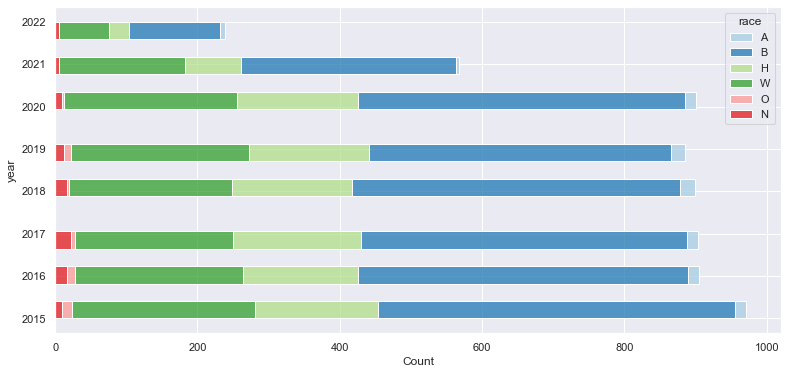

<IPython.core.display.Javascript object>

In [262]:
# Killings by race each year

sns.histplot(
    df_civilians, y="year", hue="race", multiple="stack",
)

# Number of African Americans killed is the highest each year.

In [263]:
# Average age of persons attacking police officers

filter_attack = df_civilians["threat_level"] == "attack"
df_civilians[filter_attack]["age"].mean()

35.390358974358975

<IPython.core.display.Javascript object>

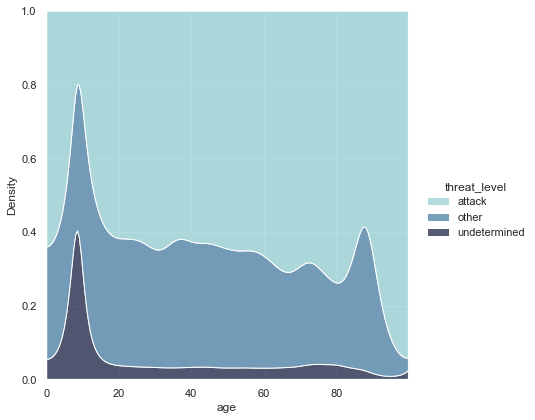

<IPython.core.display.Javascript object>

In [264]:
# Threat level density by age

sns.displot(
    data=df_civilians,
    x="age",
    hue="threat_level",
    kind="kde",
    height=6,
    multiple="fill",
    clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
)

<AxesSubplot:xlabel='month', ylabel='year'>

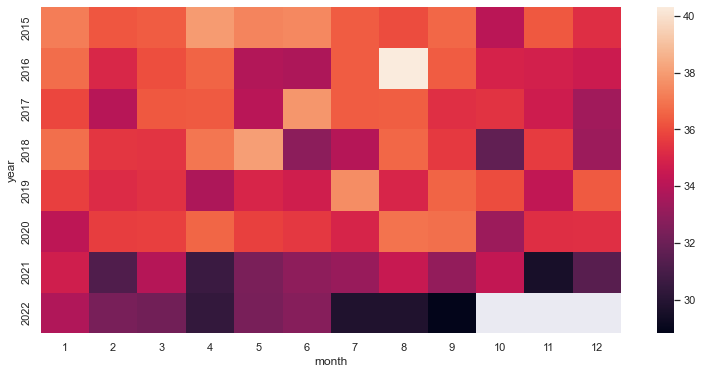

<IPython.core.display.Javascript object>

In [265]:
# Age of killed persons by year and month

civilians = df_civilians.pivot_table("age", "year", "month", aggfunc="mean")
sns.heatmap(civilians)

In [266]:
# The most popular weapon in California

filter_ca = df_civilians["state"] == "CA"
df_civilians[filter_ca]["armed"].value_counts().head(1)

gun    478
Name: armed, dtype: int64

<IPython.core.display.Javascript object>

In [267]:
import matplotlib.pyplot as plt
import geopandas as gpd

<IPython.core.display.Javascript object>

<AxesSubplot:>

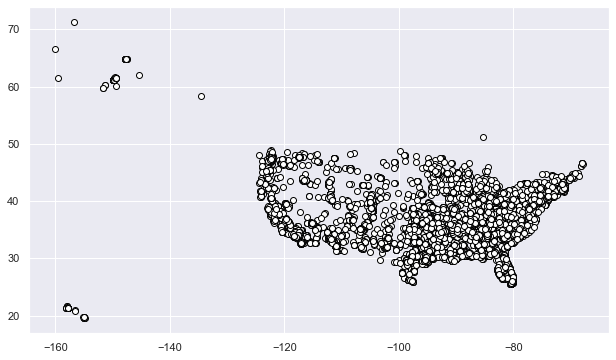

<IPython.core.display.Javascript object>

In [268]:
# Visualization on map

states_info = gpd.GeoDataFrame(
    geometry=gpd.points_from_xy(df_civilians.longitude, df_civilians.latitude),
)

states_info.plot(
    color="white", edgecolor="black", legend="city",
)